# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
# Número de saudáveis
num_saudaveis = df[df['flag_doente'] == 0]['sex'].count()

# Número de doentes
num_doentes = df[df['flag_doente'] == 1]['sex'].count()

# Total
total = df['sex'].count()

# Quantidade média de doentes
media_doentes = num_doentes / total

# Odds
odds = num_doentes / num_saudaveis

# Odds ratio (comparando com o total)
odds_ratio_total = odds / (1 - odds)

# Logito (LOG(Odds))
logito = np.log(odds)

# Weight of Evidence (WOE) com o total como referência
woe_total = np.log(odds_ratio_total)

# Exibindo os resultados
print("Número de saudáveis:", num_saudaveis)
print("Número de doentes:", num_doentes)
print("Total:", total)
print("Quantidade média de doentes:", media_doentes)
print("Odds:", odds)
print("Odds ratio (com o total como referência):", odds_ratio_total)
print("Logito (LOG(Odds)):", logito)
print("Weight of Evidence (WOE) com o total como referência:", woe_total)


Número de saudáveis: 164
Número de doentes: 139
Total: 303
Quantidade média de doentes: 0.45874587458745875
Odds: 0.8475609756097561
Odds ratio (com o total como referência): 5.559999999999999
Logito (LOG(Odds)): -0.1653924946935067
Weight of Evidence (WOE) com o total como referência: 1.7155981082624907


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [13]:
# Categorizando a variável "age" em 5 grupos:
df['age_group'] = pd.qcut(df['age'], q=5)

# Calcular as estatísticas utilizando pd.crosstab
tabela_cruzada = pd.crosstab(df['age_group'], df['flag_doente'], margins=True)

num_saudaveis = tabela_cruzada[0][:-1]
num_doentes = tabela_cruzada[1][:-1]
total = tabela_cruzada['All'][:-1]
media_doentes = num_doentes / total
odds = num_doentes / num_saudaveis

# Calculando o valor médio da variável "age":
media_age = df['age'].mean()

# Exibindo os resultados:
for i in range(5):
    print("Grupo", i+1)
    print("Número de saudáveis:", num_saudaveis[i])
    print("Número de doentes:", num_doentes[i])
    print("Total:", total[i])
    print("Quantidade média de doentes:", media_doentes[i])
    print("Odds:", odds[i])
    print("----------------------------------------")
    
print("Valor médio da variável age:", media_age)


Grupo 1
Número de saudáveis: 47
Número de doentes: 16
Total: 63
Quantidade média de doentes: 0.25396825396825395
Odds: 0.3404255319148936
----------------------------------------
Grupo 2
Número de saudáveis: 42
Número de doentes: 22
Total: 64
Quantidade média de doentes: 0.34375
Odds: 0.5238095238095238
----------------------------------------
Grupo 3
Número de saudáveis: 32
Número de doentes: 39
Total: 71
Quantidade média de doentes: 0.5492957746478874
Odds: 1.21875
----------------------------------------
Grupo 4
Número de saudáveis: 13
Número de doentes: 32
Total: 45
Quantidade média de doentes: 0.7111111111111111
Odds: 2.4615384615384617
----------------------------------------
Grupo 5
Número de saudáveis: 30
Número de doentes: 30
Total: 60
Quantidade média de doentes: 0.5
Odds: 1.0
----------------------------------------
Valor médio da variável age: 54.43894389438944


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

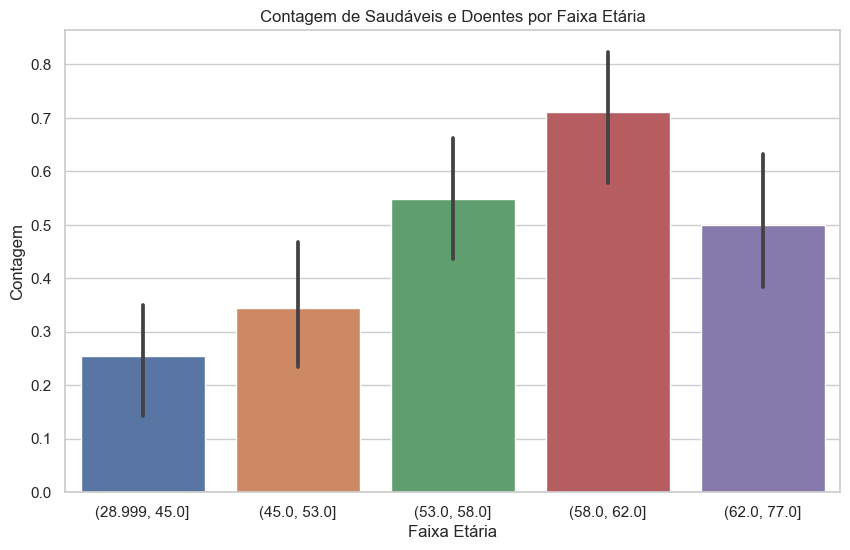

In [14]:
# Configurações do gráfico:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Criando o gráfico de barras:
ax = sns.barplot(x=df['age_group'], y=df['flag_doente'])

# Definindo rótulos e título do gráfico:
ax.set_xlabel("Faixa Etária")
ax.set_ylabel("Contagem")
ax.set_title("Contagem de Saudáveis e Doentes por Faixa Etária")

# Exibindo o gráfico:
plt.show()
